In [492]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")


/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [493]:
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pylab import rcParams
import matplotlib as mpl
from matplotlib import pyplot
import math 
from IPython.display import HTML, IFrame
from sklearn import neighbors


In [494]:
df = pd.read_excel ('child-poverty-statistics-year-ended-june-2021.xlsx', sheet_name = None)
df

{'Contents':                                                                    Child poverty statistics: Year ended June 2021  \
 0                                                                                                             NaN   
 1                                                                                                  List of tables   
 2                                                                                                             NaN   
 3                                                                                                            1.01   
 4                                                                                                            1.02   
 5                                                                                                            1.03   
 6                                                                                                            1.04   
 7                                          

In [495]:
pd.options.display.max_colwidth = 150
poverty = df['Table1.01']
poverty

,Table 1.01,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,a) Percentage of children living in households with Low income: less than 50% median equivalised disposable household income before deducting hous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year ended June 2007–2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Rate,,Annual change in rate,,Number,,Annual change in number,,Total number of children
3,,Percent,Level sampling error,Percentage points,sampling error on the change,(000s),Level sampling error,(000s),sampling error on the change,(000s)
4,2021,13.6,1.2,0.4,1.7,156.7,14.3,5.5,19.7,1149.4
5,2020(R),13.2,1.2,-0.3,1.6,151.2,14.2,-2.1,17.8,1144.1
6,2019,13.5,0.9,-2.9,1.7,153.2,10.1,-30.1,19.6,1132.8
7,2018,16.5,1.1,2.3,1.6,183.4,12.2,27.1,17.4,1113.3
8,2017,14.2,1.1,-1.2,1.6,156.3,12.4,-12.1,17.2,1103.2
9,2016,15.4,1.1,-0.9,1.6,168.3,11.9,-8.9,16.9,1093.2


In [496]:
poverty = poverty.drop(poverty.columns[[2, 3, 4, 5, 6, 7, 8, 9]], axis = 1)
poverty = poverty.loc[4:18]

In [497]:
poverty.reset_index(drop=True)

,Table 1.01,Unnamed: 1
0,2021,13.6
1,2020(R),13.2
2,2019,13.5
3,2018,16.5
4,2017,14.2
5,2016,15.4
6,2015,16.3
7,2014,14.5
8,2013,15.6
9,2012,14.8


In [498]:
poverty = poverty.rename(columns={'Table 1.01': 'Year', 'Unnamed: 1': 'Poverty'})
poverty['Year'] = poverty['Year'].replace(['2020(R)'], '2020')
poverty

,Year,Poverty
4,2021,13.6
5,2020,13.2
6,2019,13.5
7,2018,16.5
8,2017,14.2
9,2016,15.4
10,2015,16.3
11,2014,14.5
12,2013,15.6
13,2012,14.8


In [499]:
poverty['Year'] = poverty['Year'].astype(str)
poverty = poverty.sort_values('Year')
poverty

,Year,Poverty
18,2007,14
17,2008,14.5
16,2009,14
15,2010,14.1
14,2011,14.9
13,2012,14.8
12,2013,15.6
11,2014,14.5
10,2015,16.3
9,2016,15.4


In [500]:
df = pd.read_csv('inflation.csv')
df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,New Zealand,NZL,6.098444,2.625816,2.677093,1.753574,2.290249,3.037023,...,1.059913,1.134423,1.227508,0.292705,0.64624,1.850788,1.598297,1.619632,1.714562,3.941121
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Last Updated: 05/25/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
df = df.transpose()
df = df.reset_index()
inflation = df.loc[5:25]
inflation['index'] = inflation['index'].map(lambda x: str(x)[:-9])
inflation = inflation.rename(columns={'index': 'Year', 0: 'inflation'})
inflation = inflation.drop(inflation.columns[[2,3,4,5,6]], axis = 1)
inflation = inflation.reset_index(drop=True)

inflation

/var/folders/52/xsl0gx4d6rnfwvwr1czp017w0000gn/T/ipykernel_4651/1788246909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation['index'] = inflation['index'].map(lambda x: str(x)[:-9])


,Year,inflation
0,2001,2.625816
1,2002,2.677093
2,2003,1.753574
3,2004,2.290249
4,2005,3.037023
5,2006,3.365402
6,2007,2.376143
7,2008,3.958949
8,2009,2.115651
9,2010,2.302024


In [502]:
df = pd.read_csv('anfeta.timseries.csv')
df

,Indicator: Amphetamine use in the past 12 months (total population),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Source: New Zealand Health Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"*In 2020/21, there was a change to this question in the survey. Caution is advised when comparing results with previous years. For more informatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total response measure of ethnicity. People who reported more than one ethnic group are counted once in each group reported.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Disabled people are those who have at least a lot of difficulty seeing or hearing (even with glasses or hearing aids), walking or climbing stairs,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dashes indicate that the data is not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,group,percent.11,percent.12,percent.13,percent.14,percent.15,percent.16,percent.17,percent.18,percent.19,percent.20,p.value.20.11,p.value.20.15,p.value.20.19
7,NaN,Total,0.7,0.7,0.9,0.7,0.9,0.8,0.7,1.1,1.2,1,0.2533,0.9552,0.4508
8,NaN,Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Men,1,0.9,1.2,1,1.4,1.2,1,1.5,1.6,1.5,0.3679,0.9417,0.7559


In [503]:
df = df.loc[6:7]

In [504]:
amphetamine = df.transpose()
amphetamine = amphetamine.reset_index(drop=True)
amphetamine

,6,7
0,NaN,NaN
1,group,Total
2,percent.11,0.7
3,percent.12,0.7
4,percent.13,0.9
5,percent.14,0.7
6,percent.15,0.9
7,percent.16,0.8
8,percent.17,0.7
9,percent.18,1.1


In [505]:
amphetamine = amphetamine.loc[2:11]
amphetamine = amphetamine.rename(columns={6: 'Year', 7: 'Amphetamine'})
amphetamine = amphetamine.reset_index(drop=True)
regex_list = [r"\d{,3}: ", r"percent."]
amphetamine["Year"] = amphetamine["Year"].replace(regex=regex_list, value="20")

amphetamine

,Year,Amphetamine
0,2011,0.7
1,2012,0.7
2,2013,0.9
3,2014,0.7
4,2015,0.9
5,2016,0.8
6,2017,0.7
7,2018,1.1
8,2019,1.2
9,2020,1


In [506]:
df = pd.read_csv('unploy.csv')
df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,New Zealand,NZL,..,5.43,5.28,4.75,4.01,3.81,...,6.93,5.84,5.43,5.41,5.15,4.74,4.33,4.11,4.59,4.124
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Last Updated: 05/25/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [507]:
unemployment = df.transpose()
unemployment = unemployment.reset_index()
unemployment = unemployment.loc[5:25]
unemployment['index'] = unemployment['index'].map(lambda x: str(x)[:-9])
unemployment = unemployment.rename(columns={'index': 'Year', 0: 'Unemployment'})
unemployment = unemployment.drop(unemployment.columns[[2,3,4,5,6]], axis = 1)
unemployment

,Year,Unemployment
5,2001,5.43
6,2002,5.28
7,2003,4.75
8,2004,4.01
9,2005,3.81
10,2006,3.86
11,2007,3.66
12,2008,4.17
13,2009,6.12
14,2010,6.56


In [508]:
df = pd.read_csv('alcohol.csv')
df

,Litres of Alcohol (Annual-Dec),Unnamed: 1
0,NaN,Total all beverages
1,2001,26.340
2,2002,28.016
3,2003,27.978
4,2004,29.246
5,2005,30.246
6,2006,30.817
7,2007,30.713
8,2008,32.095
9,2009,31.683


In [509]:
alcohol = df.loc[1:21]
alcohol = alcohol.reset_index(drop=True)
alcohol = alcohol.rename(columns={'Litres of Alcohol (Annual-Dec)': 'Year', 'Unnamed: 1': 'Alcoohol'})
alcohol

,Year,Alcoohol
0,2001,26.340
1,2002,28.016
2,2003,27.978
3,2004,29.246
4,2005,30.246
5,2006,30.817
6,2007,30.713
7,2008,32.095
8,2009,31.683
9,2010,33.438


In [510]:
df = pd.read_csv('migration.csv')
df

,"Estimated migrant arrivals by visa type, 12/16-month rule (Annual-Dec)",Unnamed: 1
0,NaN,Arrivals
1,,TOTAL
2,,Estimate
3,2001,114597
4,2002,134046
5,2003,120591
6,2004,103496
7,2005,103982
8,2006,110687
9,2007,113450


In [511]:
migration = df.loc[3:23]
migration = migration.reset_index(drop=True)
migration = migration.rename(columns={'Estimated migrant arrivals by visa type, 12/16-month rule (Annual-Dec)': 'Year', 'Unnamed: 1': 'Migration'})
migration

,Year,Migration
0,2001,114597
1,2002,134046
2,2003,120591
3,2004,103496
4,2005,103982
5,2006,110687
6,2007,113450
7,2008,119994
8,2009,108265
9,2010,100499


In [512]:
df = pd.read_csv('crime.csv', encoding ='utf-16', sep='\t')
df['Year Month'] = df['Year Month'].map(lambda x: str(x)[-4:])
df = df.groupby(['Year Month']).Victimisations.sum()

df

Year Month
2014     70256
2015    146929
2016    143294
2017    141934
2018    140882
2019    155045
2020    139284
2021    158909
2022     30580
Name: Victimisations, dtype: int64

In [513]:
crime = pd.DataFrame(df) 
crime = crime.reset_index()
crime = crime.rename(columns={'Year Month': 'Year'})
crime = crime.drop([0,8])
#crime.at[0,'Victimisations'] = crime.at[0,'Victimisations']*2
crime

,Year,Victimisations
1,2015,146929
2,2016,143294
3,2017,141934
4,2018,140882
5,2019,155045
6,2020,139284
7,2021,158909


In [550]:
df = pd.read_csv('crimebefore.csv')
df = df.loc[181:198]
df = df.drop(df.columns[[0, 1,2,3,4,5,8]], axis = 1)
crimebefore = df.reset_index(drop=True)
crimebefore = crimebefore.rename(columns={'Value': 'Victimisations'})
crimebefore

,Year,Victimisations
0,2001,196400
1,2002,203353
2,2003,213735
3,2004,200502
4,2005,193898
5,2006,203488
6,2007,213759
7,2008,221806
8,2009,238111
9,2010,223451


In [551]:
crime1 = crimebefore.append([crime])
crime1 = crime1.reset_index(drop=True)
crime1 = crime1.astype(str)
crime1

,Year,Victimisations
0,2001,196400
1,2002,203353
2,2003,213735
3,2004,200502
4,2005,193898
5,2006,203488
6,2007,213759
7,2008,221806
8,2009,238111
9,2010,223451


In [576]:
datafinal = pd.merge(crime1, migration, how='left', left_on=['Year'], right_on=['Year'])
datafinal = pd.merge(datafinal, alcohol, how='left', left_on=['Year'], right_on=['Year'])
datafinal = pd.merge(datafinal, unemployment, how='left', left_on=['Year'], right_on=['Year'])
#datafinal = pd.merge(datafinal, amphetamine, how='left', left_on=['Year'], right_on=['Year'])
datafinal = pd.merge(datafinal, poverty, how='left', left_on=['Year'], right_on=['Year'])
datafinal = pd.merge(datafinal, inflation, how='left', left_on=['Year'], right_on=['Year'])
datafinal = datafinal.astype(float)
datafinal

,Year,Victimisations,Migration,Alcoohol,Unemployment,Poverty,inflation
0,2001.0,196400.0,114597.0,26.340,5.430,NaN,2.625816
1,2002.0,203353.0,134046.0,28.016,5.280,NaN,2.677093
2,2003.0,213735.0,120591.0,27.978,4.750,NaN,1.753574
3,2004.0,200502.0,103496.0,29.246,4.010,NaN,2.290249
4,2005.0,193898.0,103982.0,30.246,3.810,NaN,3.037023
5,2006.0,203488.0,110687.0,30.817,3.860,NaN,3.365402
6,2007.0,213759.0,113450.0,30.713,3.660,14.0,2.376143
7,2008.0,221806.0,119994.0,32.095,4.170,14.5,3.958949
8,2009.0,238111.0,108265.0,31.683,6.120,14.0,2.115651
9,2010.0,223451.0,100499.0,33.438,6.560,14.1,2.302024


In [577]:
datafinal1 = datafinal.loc[6:20]
datafinal1 = datafinal1.astype(float)

In [554]:
import statsmodels.api as smf
import patsy
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model = smf.ols(formula='Victimisations ~ 1 + Migration + Alcoohol + Unemployment + Poverty + inflation', data=datafinal1).fit()

model.summary()

/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Victimisations   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     11.21
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00118
Time:                        22:25:56   Log-Likelihood:                -163.21
No. Observations:                  15   AIC:                             338.4
Df Residuals:                       9   BIC:                             342.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.172e+05   1.53e+05      4.691      0.001    3.71e+05    1.06e+06
Migration        0.0331      0.217      0.152      0.882      -0.459       0.525
Alcoohol     -1.469e+04   3042.675     -4.828      0.001   -2.16e+04   -7806.114
Unemployment  1.186e+04   5028.771      2.359      0.043     488.974    2.32e+04
Poverty      -1.004e+04   5282.116     -1.901      0.090    -2.2e+04    1910.289
inflation     1.629e+04   4968.755      3.279      0.010    5052.279    2.75e+04
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.497
Skew:                          -0.208   Prob(JB):                        0.780
Kurtosis:                       2.212   Cond. No.                     4.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [555]:
model1 = smf.ols(formula='Victimisations ~ 1 + Migration + Alcoohol + Unemployment + inflation', data=datafinal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Victimisations   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     7.429
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00140
Time:                        22:25:57   Log-Likelihood:                -236.28
No. Observations:                  21   AIC:                             482.6
Df Residuals:                      16   BIC:                             487.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      3.05e+05   8.59e+04      3.552      0.003    1.23e+05    4.87e+05
Migration       -0.0593      0.248     -0.239      0.814      -0.585       0.467
Alcoohol     -6345.0295   1831.937     -3.464      0.003   -1.02e+04   -2461.497
Unemployment  1.118e+04   5218.798      2.142      0.048     117.266    2.22e+04
inflation     1.562e+04   5768.738      2.708      0.016    3392.259    2.79e+04
==============================================================================
Omnibus:                        0.618   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.604
Skew:                           0.347   Prob(JB):                        0.739
Kurtosis:                       2.544   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [567]:
df = pd.read_csv('traffic.csv')
#df = df.loc[2610:2689]
#df = df.drop(df.columns[[0, 1,2,4,6]], axis = 1)

In [568]:
df = df.sort_values(by=['Offence'])
df = df.reset_index(drop=True)
df = df.drop(df.columns[[0, 1,2,4,6]], axis = 1)
df1 = df.loc[0:13]
df1 = df1.sort_values(by=['Year'])
df2 = df.loc[14:27]
df2 = df2.sort_values(by=['Year'])
df3 = df.loc[28:41]
df3 = df3.sort_values(by=['Year'])
drug = pd.merge(df1, df2, how='left', left_on=['Year'], right_on=['Year'])
drug = pd.merge(drug, df3, how='left', left_on=['Year'], right_on=['Year'])
drug['drug'] = drug['Value_x'] + drug['Value_y'] + drug['Value']
drug = drug.drop(drug.columns[[ 1,2,3]], axis = 1)
drug

,Year,drug
0,2001,5097
1,2002,4748
2,2003,4231
3,2004,3718
4,2005,3696
5,2006,3733
6,2007,3758
7,2008,4940
8,2009,6172
9,2010,5563


In [569]:
df = pd.read_excel ('drugs12.xlsx', sheet_name = None)
df

{'Contents':                                                                                                                                                Unnamed: 0  \
 0                                                                                                                                                     NaN   
 1                                                                                                                                                     NaN   
 2                                                                                                                                                     NaN   
 3                                                                                                                                                     NaN   
 4                                                                                                                                                     NaN   
 5                                      

In [570]:

pd.options.display.max_colwidth = 150
drugafter = df['1a.Charges by offence']
drugafter = drugafter.loc[4:7]
drugafter = drugafter.drop(drugafter.columns[[0, 1,2,3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], axis = 1)
drugafter = drugafter.transpose()
drugafter = drugafter.reset_index(drop=True)
drugafter['drug'] = drugafter[5] + drugafter[6] + drugafter[7]

In [571]:
drugafter

,4,5,6,7,drug
0,2015.0,118.0,2178.0,204.0,2500.0
1,2016.0,140.0,2749.0,125.0,3014.0
2,2017.0,243.0,3103.0,127.0,3473.0
3,2018.0,122.0,2843.0,99.0,3064.0
4,2019.0,138.0,3134.0,74.0,3346.0
5,2020.0,103.0,3769.0,56.0,3928.0
6,2021.0,64.0,3385.0,100.0,3549.0


In [572]:
drugafter[4] = drugafter[4].map(lambda x: str(x)[:-2])
drugafter = drugafter.rename(columns={4: 'Year'})
drugafter = drugafter.drop(drugafter.columns[[1,2,3]], axis = 1)
drugafter

,Year,drug
0,2015,2500.0
1,2016,3014.0
2,2017,3473.0
3,2018,3064.0
4,2019,3346.0
5,2020,3928.0
6,2021,3549.0


In [573]:
drugafter

,Year,drug
0,2015,2500.0
1,2016,3014.0
2,2017,3473.0
3,2018,3064.0
4,2019,3346.0
5,2020,3928.0
6,2021,3549.0


In [574]:
drug = drug.append([drugafter])
drug = drug.astype(float)
drug

,Year,drug
0,2001.0,5097.0
1,2002.0,4748.0
2,2003.0,4231.0
3,2004.0,3718.0
4,2005.0,3696.0
5,2006.0,3733.0
6,2007.0,3758.0
7,2008.0,4940.0
8,2009.0,6172.0
9,2010.0,5563.0


In [578]:
datafinal0 = pd.merge(datafinal, drug, how='left', left_on=['Year'], right_on=['Year'])
datafinal0['Year'] = datafinal0['Year'].astype(str)
datafinal0

,Year,Victimisations,Migration,Alcoohol,Unemployment,Poverty,inflation,drug
0,2001.0,196400.0,114597.0,26.340,5.430,NaN,2.625816,5097.0
1,2002.0,203353.0,134046.0,28.016,5.280,NaN,2.677093,4748.0
2,2003.0,213735.0,120591.0,27.978,4.750,NaN,1.753574,4231.0
3,2004.0,200502.0,103496.0,29.246,4.010,NaN,2.290249,3718.0
4,2005.0,193898.0,103982.0,30.246,3.810,NaN,3.037023,3696.0
5,2006.0,203488.0,110687.0,30.817,3.860,NaN,3.365402,3733.0
6,2007.0,213759.0,113450.0,30.713,3.660,14.0,2.376143,3758.0
7,2008.0,221806.0,119994.0,32.095,4.170,14.5,3.958949,4940.0
8,2009.0,238111.0,108265.0,31.683,6.120,14.0,2.115651,6172.0
9,2010.0,223451.0,100499.0,33.438,6.560,14.1,2.302024,5563.0


In [580]:
model2 = smf.ols(formula='Victimisations ~ 1 + Migration + Alcoohol + Unemployment + inflation + drug', data=datafinal0).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Victimisations   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     8.252
Date:                Mon, 30 May 2022   Prob (F-statistic):           0.000644
Time:                        22:30:05   Log-Likelihood:                -233.42
No. Observations:                  21   AIC:                             478.8
Df Residuals:                      15   BIC:                             485.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.651e+05   7.96e+04      3.330      0.005    9.54e+04    4.35e+05
Migration        0.0233      0.227      0.103      0.920      -0.460       0.507
Alcoohol     -5136.7995   1743.004     -2.947      0.010   -8851.924   -1421.675
Unemployment -1611.9514   7550.769     -0.213      0.834   -1.77e+04    1.45e+04
inflation     1.116e+04   5592.703      1.996      0.064    -758.157    2.31e+04
drug            15.1230      6.982      2.166      0.047       0.241      30.005
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.171
Skew:                          -0.109   Prob(JB):                        0.918
Kurtosis:                       2.614   Cond. No.                     2.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

ValueError: array must not contain infs or NaNs

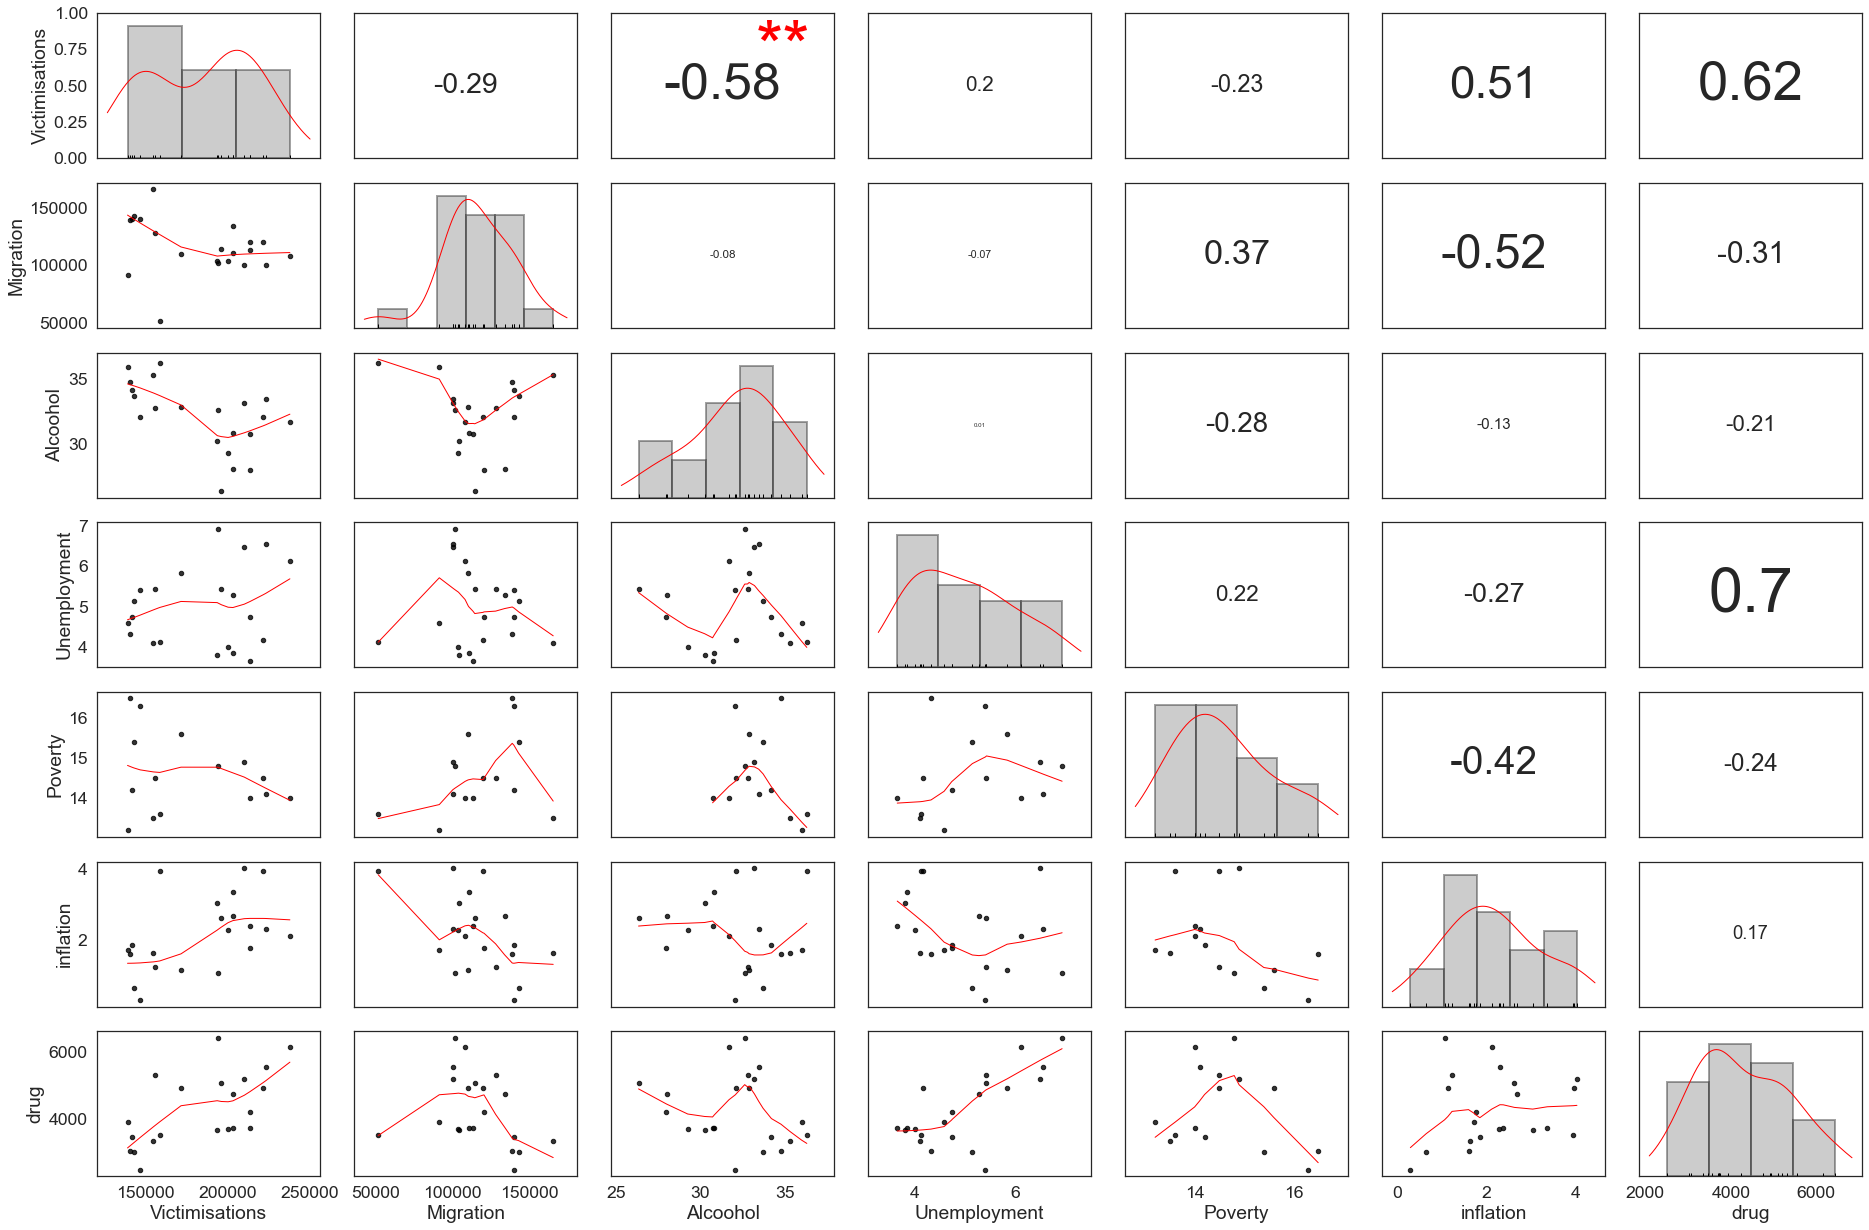

In [581]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)
sns.set(style='white', font_scale=1.6)
#iris = sns.load_dataset('iris')
g = sns.PairGrid(datafinal0, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), analise.columns):
    ax.set_title(col, y=0.82, fontsize=26)

In [583]:
def stepwise_backwards_regression(response_var, exp_vars, df):
    while len(exp_vars) > 0:
        forml = response_var + ' ~ 1 +' + ' + '.join(exp_vars)
        print(forml)
        model = smf.ols(formula= forml, data=df).fit()

        sorted_ps = model.pvalues.sort_values(ascending=False).drop('Intercept')
        if (sorted_ps[0]) > 0.05:
            exp_vars = sorted_ps.index[1:].values
            drop = sorted_ps.index[0]
            print(str(len(exp_vars)) + ' var model AIC: ' + str(model.aic) + ', adj Rsq: ' + str(model.rsquared_adj))
            print('Dropped: ' + drop + ' with p-value ' + str(round(sorted_ps[0],3)))
        else:
            return model
    return model

In [584]:
modelStep = stepwise_backwards_regression('Victimisations', [u'Migration', u'Alcoohol', u'Unemployment', u'inflation', u'drug'], datafinal0[[u'Migration', u'Alcoohol', u'Unemployment', u'inflation', u'drug', 'Victimisations']])
modelStep   

Victimisations ~ 1 +Migration + Alcoohol + Unemployment + inflation + drug
4 var model AIC: 478.83776319588367, adj Rsq: 0.6445117953609492
Dropped: Migration with p-value 0.92
Victimisations ~ 1 +Unemployment + inflation + drug + Alcoohol
3 var model AIC: 476.85251332777545, adj Rsq: 0.6664956411947023
Dropped: Unemployment with p-value 0.826
Victimisations ~ 1 +drug + inflation + Alcoohol


In [594]:
modelfinal = smf.ols(formula='Victimisations ~ 1  + Alcoohol  + inflation + drug', data=datafinal0).fit()
modelfinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Victimisations   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     15.51
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.08e-05
Time:                        22:49:21   Log-Likelihood:                -233.46
No. Observations:                  21   AIC:                             474.9
Df Residuals:                      17   BIC:                             479.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.686e+05   5.69e+04      4.724      0.000    1.49e+05    3.89e+05
Alcoohol   -5259.6918   1556.567     -3.379      0.004   -8543.761   -1975.622
inflation   1.148e+04   3874.333      2.964      0.009    3309.463    1.97e+04
drug          13.8090      3.892      3.548      0.002       5.598      22.020
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.176
Skew:                          -0.092   Prob(JB):                        0.916
Kurtosis:                       2.591   Cond. No.                     6.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ERROR! Session/line number was not unique in database. History logging moved to new session 49


In [595]:
from sklearn.model_selection import train_test_split

X = datafinal0[['Alcoohol'  ,'inflation' , 'drug']].values
X = np.reshape(X, (len(datafinal0[['Alcoohol'  ,'inflation' , 'drug']]), 3))
y = datafinal0.Victimisations.values
y = np.reshape(y, (len(datafinal0.Victimisations), 1))
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.33, random_state=42)

In [596]:
knn0 = neighbors.KNeighborsRegressor(n_neighbors=5, metric='euclidean')
modelfit0 = knn0.fit(X_train0, y_train0)

In [ ]:
y_hat0 = modelfinal.predict(X_test0)

In [599]:
from sklearn.model_selection import cross_val_score
import numpy as np

def scoremean (knnmean, X_testmean, y_testmean):

    cv_scoress = cross_val_score(knnmean, X_testmean, y_testmean, cv=5)
    print(cv_scoress)
    print('cv_scores mean:{}'.format(np.mean(cv_scoress)))

    
    return

In [600]:
scoremean(knn0, X_test0, y_test0)

[-1.00541095 -0.50209491         nan         nan         nan]
cv_scores mean:nan


/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/robertoaltran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
